# 6.1 Sentiment Distribution by Brand

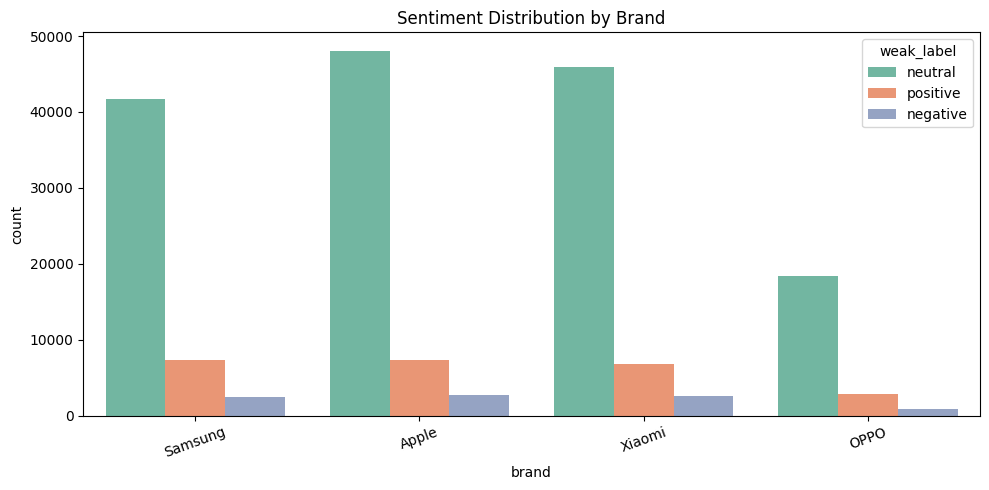

C:\Users\thean\AppData\Local\Temp\ipykernel_14756\56407323.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


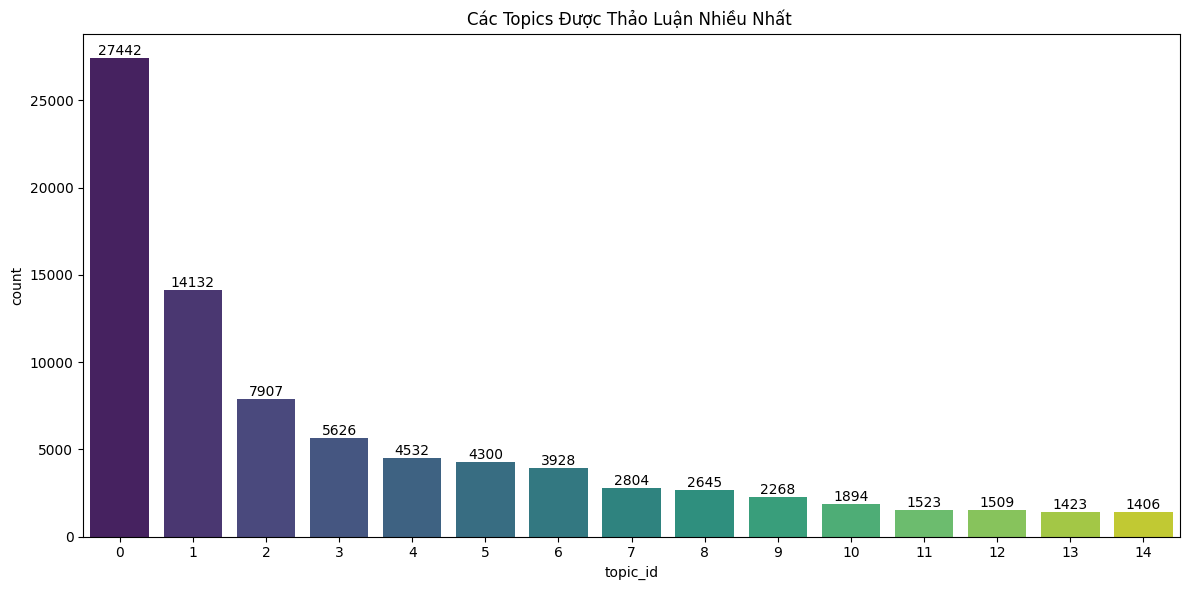

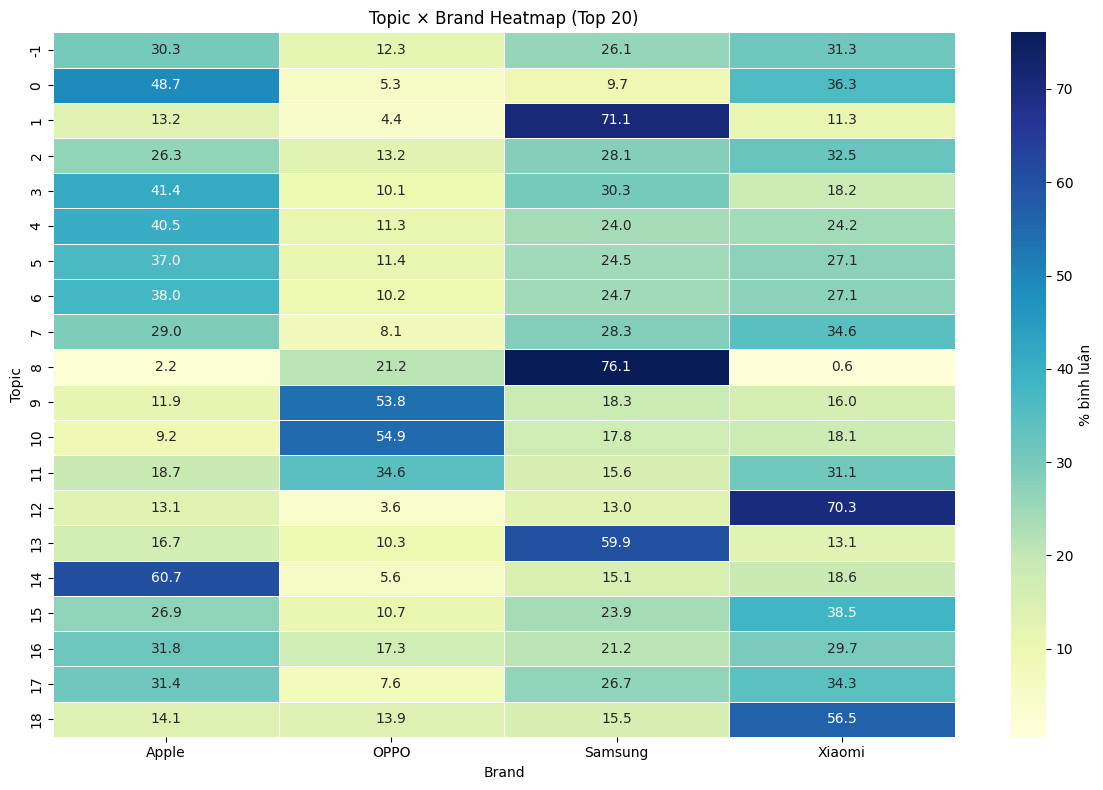

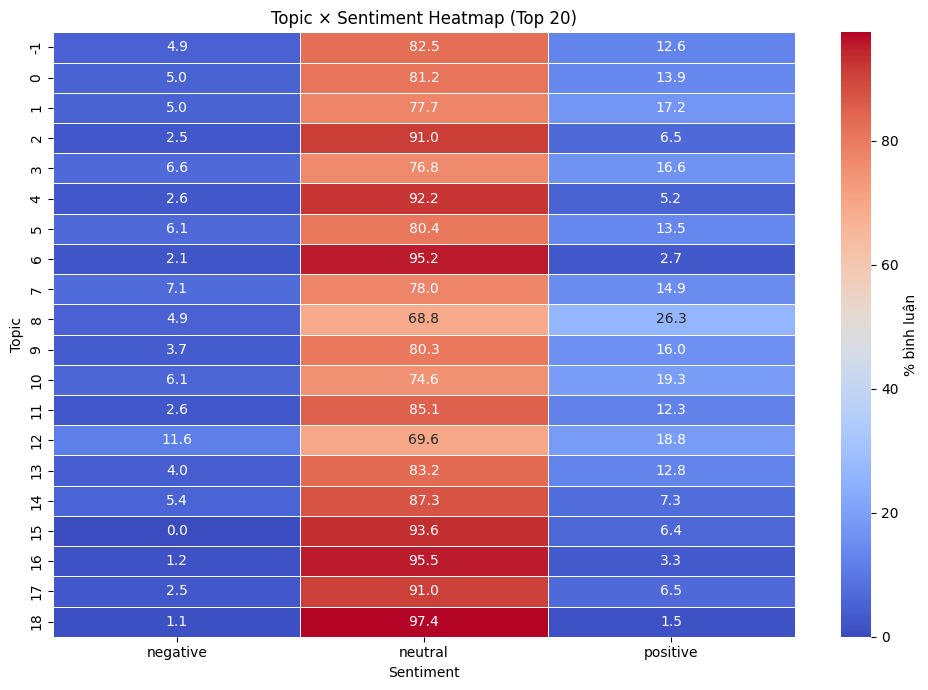

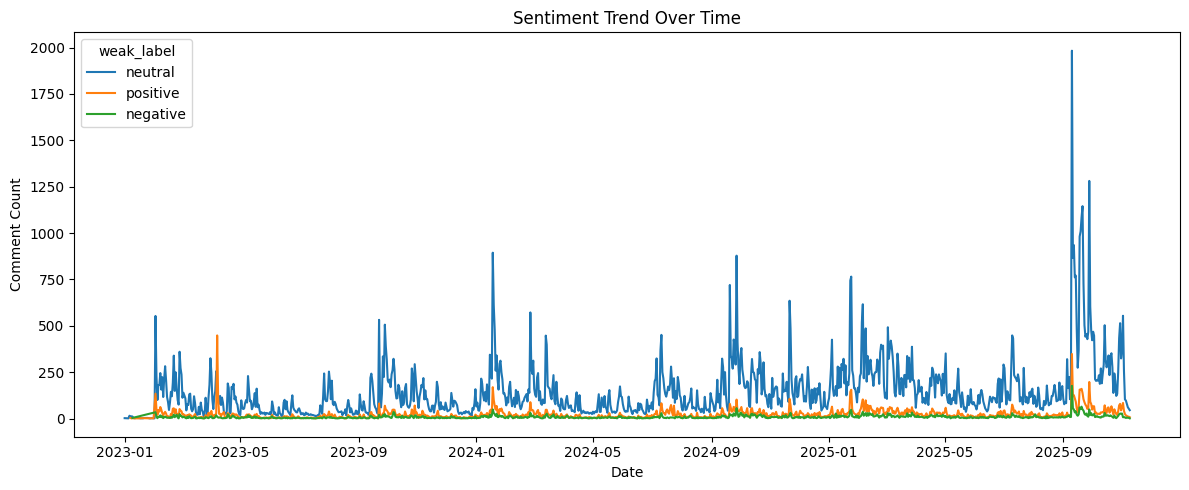

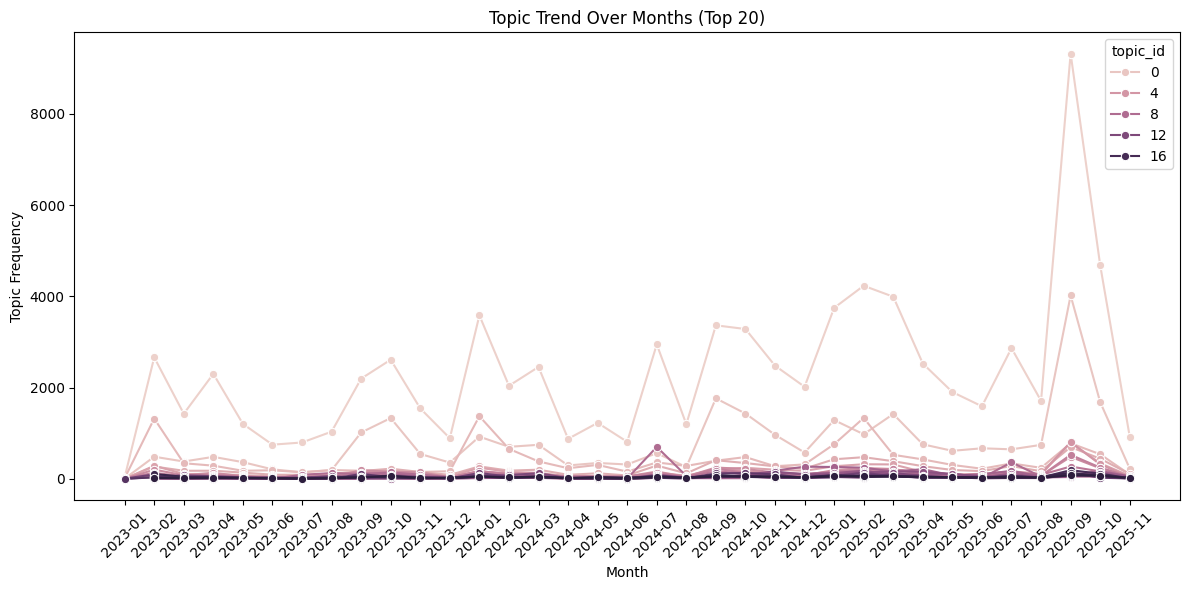

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("analysis_master.csv")


# =========================================
# 6.1 Sentiment × Brand
# =========================================
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="brand", hue="weak_label", palette="Set2")
plt.title("Sentiment Distribution by Brand")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()


# =========================================
# 6.2 TOP TOPICS
# =========================================
# Loại topic nhiễu (-1)
filtered_df = df[df["topic_id"] != -1]

top_topics = filtered_df["topic_id"].value_counts().head(15)

plt.figure(figsize=(12, 6))

sns.barplot(
    x=top_topics.index,     
    y=top_topics.values,    
    palette="viridis"
)

plt.title("Các Topics Được Thảo Luận Nhiều Nhất ")
plt.xlabel("topic_id")
plt.ylabel("count")

# Hiển thị số lượng trên đỉnh mỗi cột
for i, value in enumerate(top_topics.values):
    plt.text(i, value, f"{value}", ha="center", va="bottom")

plt.tight_layout()
plt.show()



# =========================================
# CHUẨN BỊ TOPIC TOP 20
# =========================================
top20 = df["topic_id"].value_counts().head(20).index
df_top = df[df["topic_id"].isin(top20)]


# =========================================
# 6.3 Topic × Brand Heatmap
# =========================================

# Crosstab (đếm)
topic_brand_cnt = pd.crosstab(df_top["topic_id"], df_top["brand"])

# Chuẩn hoá theo hàng -> %
topic_brand_pct = topic_brand_cnt.div(
    topic_brand_cnt.sum(axis=1), axis=0
) * 100

plt.figure(figsize=(12,8))
sns.heatmap(
    topic_brand_pct,
    cmap="YlGnBu",
    annot=True,           
    fmt=".1f",            
    linewidths=0.5,
    cbar_kws={"label": "% bình luận"}
)

plt.title("Topic × Brand Heatmap (Top 20)")
plt.ylabel("Topic")
plt.xlabel("Brand")
plt.tight_layout()
plt.show()


# =========================================
# 6.4 Topic × Sentiment Heatmap
# =========================================
topic_sent_cnt = pd.crosstab(df_top["topic_id"], df_top["weak_label"])

topic_sent_pct = topic_sent_cnt.div(
    topic_sent_cnt.sum(axis=1), axis=0
) * 100

plt.figure(figsize=(10,7))
sns.heatmap(
    topic_sent_pct,
    cmap="coolwarm",
    annot=True,
    fmt=".1f",
    linewidths=0.5,
    cbar_kws={"label": "% bình luận"}
)

plt.title("Topic × Sentiment Heatmap (Top 20)")
plt.ylabel("Topic")
plt.xlabel("Sentiment")
plt.tight_layout()
plt.show()


# =========================================
# 6.5 Sentiment Trend Over Time 
# =========================================

df["date_vn"] = pd.to_datetime(df["date_vn"], errors="coerce")

df_daily = (
    df.dropna(subset=["date_vn"])
      .groupby([df["date_vn"].dt.date, "weak_label"])
      .size()
      .reset_index(name="count")
)

plt.figure(figsize=(12,5))
sns.lineplot(data=df_daily, x="date_vn", y="count", hue="weak_label")
plt.title("Sentiment Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Comment Count")
plt.tight_layout()
plt.show()


# =========================================
# 6.6 Topic Trend Over Months 
# =========================================

# CHUYỂN PERIOD -> STRING YYYY-MM
df["month_vn"] = pd.to_datetime(df["date_vn"], errors="coerce").dt.strftime("%Y-%m")

df_month_topic = (
    df[df["topic_id"].isin(top20)]
      .dropna(subset=["month_vn"])
      .groupby(["month_vn", "topic_id"])
      .size()
      .reset_index(name="count")
)

# SORT THEO THỜI GIAN
df_month_topic = df_month_topic.sort_values("month_vn")

plt.figure(figsize=(12,6))
sns.lineplot(
    data=df_month_topic,
    x="month_vn",
    y="count",
    hue="topic_id",
    marker="o"
)
plt.title("Topic Trend Over Months (Top 20)")
plt.xlabel("Month")
plt.ylabel("Topic Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()